# Доверительные интервалы. Задача 1


__Ильичёв А.С., 693__

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Сгенерируем выборки $X_1, \dots, X_{100}$ из распределений $P_{\theta}$ в теоретических задачах $6.1, 6.3, 6.4, 6.5$ и построим доверительные интервалы, полученные в этих задачах, для уровня доверия $\alpha = 0.95$ и $n \le 100$. Для $n = 100$ оценим вероятность попадания истинного значения в интервал.

In [2]:
N = 100
ns = np.arange(1, N + 1)
theta = 10
alpha = 0.95

Напишем функцию для построения доверительных интервалов.

In [3]:
def plot_CI(left, right, sample, lim=None):
    plt.figure(figsize=(10, 5))
    lefts = [left(sample[:n]) for n in ns]
    rights = [right(sample[:n]) for n in ns]
    plt.plot(ns, lefts, c='black')
    plt.plot(ns, rights, c='black')
    plt.fill_between(ns, lefts, rights, color='lightgrey',
                     label=r'ДИ для $\theta$')
    plt.plot([ns[0], ns[-1]], [theta, theta], '--', c='red',
             label=r'Истинное значение $\theta$')
    plt.legend()
    plt.xlabel(r'$n$')
    if lim:
        plt.ylim(lim[0], lim[1])
    plt.show()

Напишем функцию для оценки вероятности попадания истинного значения в интервал. Для этого сгенерируем достаточно много выборок, построим по каждой из них интервалы и определим, попадает ли в интервал истинное значение $\theta$. Будем брать 10000 выборок, чтобы получить оценку с 4 знаками после запятой. Попадание оценки в интервал является событием из распределения Бернулли. Как известно, эффективной оценкой для распределения Бернулли является $\overline X$. Ее и будем считать.

In [4]:
def calc_probability(distr, left, right, sample):
    num = 10000
    samples = distr.rvs(size=(num, N))
    xsum = 0
    for s in samples:
        xsum += (left(s) < theta < right(s))
    print('Оценка вероятности попадания истинного '+
          'значения theta в интервал: ', xsum / num)

__6.1.__   $U[0, \theta],\, \theta = 10$

In [8]:
distr = sts.uniform(0, theta)
sample = distr.rvs(N)

__а)__ Используем статистику $\overline X$. Доверительный интервал (не является точным):
$$ \left(\frac{\overline X}{\frac12 + \frac1{\sqrt{12n(1-\alpha)}}}, 
    \begin{cases}
       \frac{\overline X}{\frac12 - \frac1{\sqrt{12n(1-\alpha)}}}, & \text{if}\ \sqrt{12n(1-\alpha)} > 2 \\
       +\infty, & \text{otherwise}
    \end{cases}
   \right).
   $$
Такой необычный вид правой границы связан с условием $\overline X \ge 0$ и тем, что мы получали доверительный интервал из неравенства Чебышёва для $\overline X$.

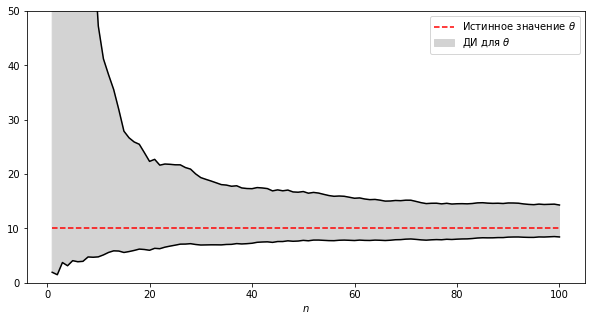

Оценка вероятности попадания истинного значения theta в интервал:  1.0


In [9]:
left = lambda x: np.mean(x) / (1 / 2 + 1/np.sqrt(12 * len(x) * (1 - alpha)))
right = lambda x: (np.mean(x) / (1 / 2 - 1/np.sqrt(12 * len(x) * (1 - alpha)))
                if np.sqrt(12 * len(x) * (1 - alpha)) > 2 else 10**9)
plot_CI(left, right, sample, lim=(0, 50))
calc_probability(distr, left, right, sample)

__б)__ Используем статистику $X_{(1)}$. Доверительный интервал (точный):
$$
\left(
X_{(1)}
,\,
\frac{X_{(1)}}{1 - \sqrt[n]{\alpha}}
\right)
.$$

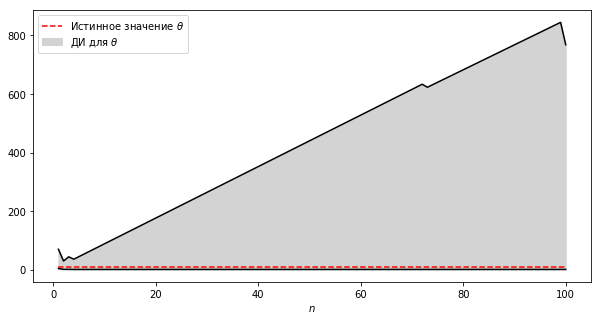

Оценка вероятности попадания истинного значения theta в интервал:  0.9472


In [10]:
left = lambda x: np.min(x)
right = lambda x: np.min(x) / (1 - alpha ** (1 / len(x)))
plot_CI(left, right, sample)
calc_probability(distr, left, right, sample)

__в)__ Используем статистику $X_{(n)}$. Доверительный интервал (точный):
$$
\left(
X_{(n)}
,\,
\frac{X_{(n)}}{\sqrt[n]{1 - \alpha}}
\right)
.$$

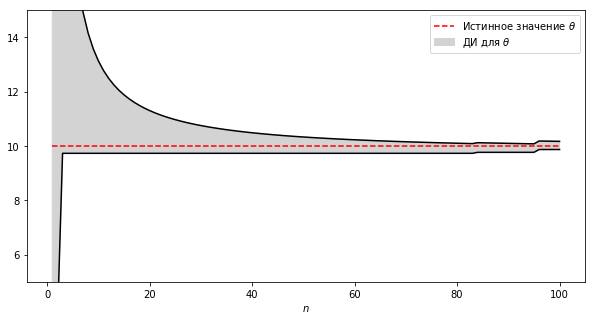

Оценка вероятности попадания истинного значения theta в интервал:  0.9508


In [11]:
left = lambda x: np.max(x)
right = lambda x: np.max(x) / (1 - alpha) ** (1 / len(x))
plot_CI(left, right, sample, lim=(5, 15))
calc_probability(distr, left, right, sample)

__6.3.__   $Cauchy(\theta, 1),\, \theta = 10$. Асимптотический доверительный интервал:
$$
\left(
\hat\mu - \frac{\pi U_{\frac{1 + \alpha}2}}{2\sqrt n}
,\,
\hat\mu + \frac{\pi U_{\frac{1 + \alpha}2}}{2\sqrt n}
\right)
,$$ 
где $U_p$ - $p$-квантиль стандартного нормального распределения (реализован как `sts.norm.ppf(p)`), а $\hat\mu$ - выборочная медиана.

Мы еще встретим в дальнейшем ${\frac{1 + \alpha}2}$-квантиль, поэтому сохраним в его в отдельную переменную.

In [12]:
u = sts.norm.ppf((1 + alpha) / 2)

In [13]:
u

1.959963984540054

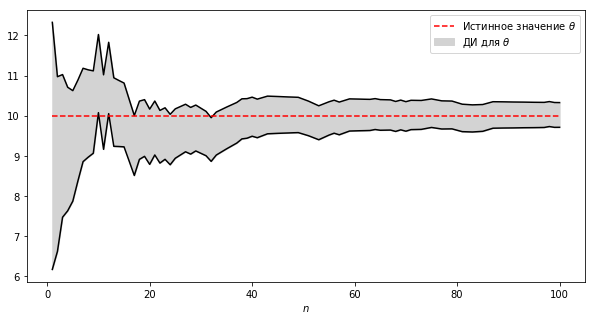

Оценка вероятности попадания истинного значения theta в интервал:  0.9451


In [14]:
distr = sts.cauchy(loc=theta)
sample = distr.rvs(N)
left = lambda x: np.median(x) - (np.pi * u / (2 * np.sqrt(len(x))))
right = lambda x: np.median(x) + (np.pi * u / (2 * np.sqrt(len(x))))
plot_CI(left, right, sample)
calc_probability(distr, left, right, sample)

__6.4.__   $Pois(\theta),\, \theta = 10$. Асимптотический доверительный интервал:
$$
\left(
\overline X - \sqrt{\frac{\overline X}n} U_{\frac{1 + \alpha}2}
,\,
\overline X + \sqrt{\frac{\overline X}n} U_{\frac{1 + \alpha}2}
\right)
.$$ 

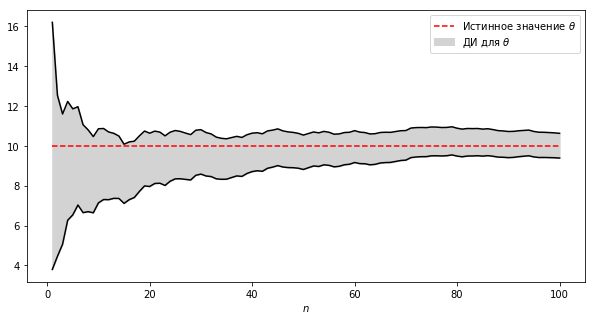

Оценка вероятности попадания истинного значения theta в интервал:  0.9484


In [15]:
distr = sts.poisson(theta)
sample = distr.rvs(N)
left = lambda x: np.mean(x) - u * np.sqrt(np.mean(x)/len(x))
right = lambda x: np.mean(x) + u * np.sqrt(np.mean(x)/len(x))
plot_CI(left, right, sample)
calc_probability(distr, left, right, sample)

__6.5.__   $Gamma(\theta, \lambda),\, \theta = 10, \lambda = 3$. 

In [20]:
lam = 3
distr = sts.gamma(a=theta, scale=1/lam)
sample = distr.rvs(N)

__а)__ Пусть $\lambda$ известно. Асимптотический доверительный интервал:
$$
\left(
\lambda
\left(
\overline X - \sqrt{\frac{\overline X}{\lambda n}} U_{\frac{1 + \alpha}2}
\right)
,\,
\lambda
\left(
\overline X + \sqrt{\frac{\overline X}{\lambda n}} U_{\frac{1 + \alpha}2}
\right)
\right)
.$$ 

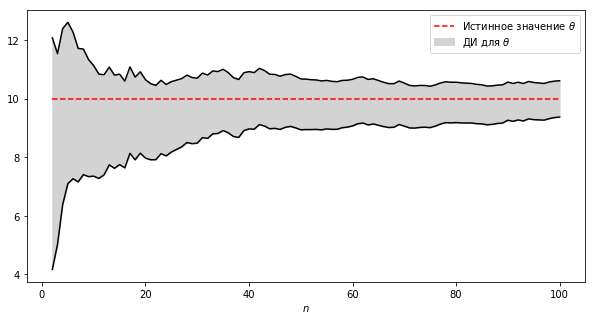

Оценка вероятности попадания истинного значения theta в интервал:  0.949


In [21]:
left = lambda x: lam * (np.mean(x) - u * np.sqrt(np.mean(x)/(len(x) * lam)))
right = lambda x: lam * (np.mean(x) + u * np.sqrt(np.mean(x)/(len(x) * lam)))
plot_CI(left, right, sample)
calc_probability(distr, left, right, sample)

__б)__ Пусть $\lambda$ неизвестно. Тогда, так как ДИ асимптотический, мы можем в интервале заменить $\lambda$ на ее состоятельную оценку. Таковой является оценка методом моментов $\lambda^* = \frac{\overline X}{\overline{X^2} - \left(\overline X\right)^2}$ (по утверждению из семинара). Получаем:
$$
\left(
A - \sqrt{\frac{A}{n}} U_{\frac{1 + \alpha}2}
,\,
A + \sqrt{\frac{A}{n}} U_{\frac{1 + \alpha}2}
\right), 
\text{где } A = \lambda^*\overline X = \frac{\left(\overline X\right)^2}{\overline{X^2} - \left(\overline X\right)^2}
.$$ 

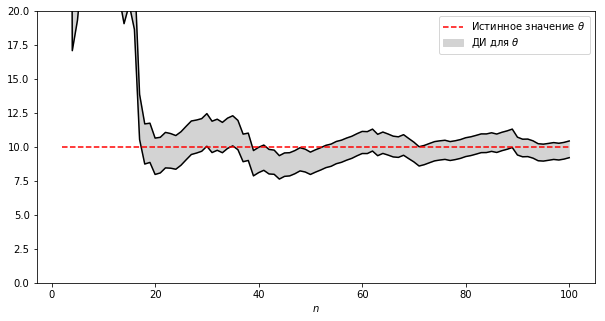

Оценка вероятности попадания истинного значения theta в интервал:  0.3211


In [22]:
N = 100
# для n = 1 будет 0 в знаменателе, поэтому начнем с 2
ns = np.arange(2, N + 1)
A = lambda x: np.mean(x)**2 / (np.mean(x**2) - 
                 np.mean(x)**2)
left = lambda x: A(x) - np.sqrt(A(x)/len(x)) * u
right = lambda x: A(x) + np.sqrt(A(x)/len(x)) * u
plot_CI(left, right, sample, lim=(0, 20))
calc_probability(distr, left, right, sample)

#### 2. Вывод.  

Доверительные интервалы, построенные с помощью состоятельных (с точностью до постоянного множителя) оценок, сужаются с ростом $n$. При этом оценка вероятности попадания истинного значения в интервал с хорошей точностью соответствует уровню доверия интервала даже в асимптотическом случае. В пункте __6.1 (б)__ интервал расходится, это связано с тем, что оценка не является состоятельной (по сути, мы пытаемся оценить верхнюю границу распределения, имея только нижнюю). В __6.5 (б)__ получается очень низкая оценка вероятности попадания в интервал. Это может объясняться как тем, что метод построения интервала, в котором мы заменяем неизвестный параметр его оценкой, не очень эффективный, так и тем, что сама оценка $\lambda$, полученная методом моментов, недостаточно "хорошая" (например, медленно сходится к истинному значению; в утверждении, доказывающем состоятельность, не уточняется скорость сходимости).